In [132]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings


# Hide warning message when importing 'xlsx' files
warnings.filterwarnings('ignore', category = UserWarning, module = 'openpyxl')



### ERP export

In [133]:
# Importing the Excel file
products = pd.read_excel('Fichier_erp.xlsx')
products.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [134]:
# File dimension
print(products.shape)

(825, 5)


In [135]:
# Checking for missing values
products.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [136]:
produits.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [138]:
# Checking for duplicates on primary key
produits['product_id'].duplicated().sum()

0

In [139]:
print(products.shape)

(825, 5)


### DATA LINK file

In [140]:
# Importing the excel files
data_link = pd.read_excel('fichier_liaison.xlsx')
data_link.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [141]:
# File dimension
data_link.shape

(825, 2)


Also, the intern mentioned that she misnamed the column 'id_web'; it should have been 'sku' to match the CMS data. So first, we need to rename the column.


In [142]:
# Rename the column 'id_web' into 'sku'
data_link.rename(columns={'id_web':'sku'}, inplace=True)

In [143]:
# Checking for duplicates for the 'sku' and  the 'product_id' columns
duplicates = data_link.duplicated(subset=['product_id', 'sku']).sum()
print(duplicates)


0


In [144]:
# Checking for missing value
data_link.isnull().sum()

product_id     0
sku           91
dtype: int64

91 values are missing for 'sku'. The associated products won't be matched with their sales, so there's no need to retain them.

In [145]:
# Deleting missing values
data_link = data_link.dropna().reset_index(drop=True)

#reset_index(drop=True) resets the index of the DataFrame after dropping the rows and drops the previous index, 
#replacing it with a new one starting from 0.
#The drop=True parameter ensures that the previous index is not added as a new column in the DataFrame.
data_link.isnull().sum()
data_link.shape

(734, 2)

## CMS export

In [146]:
web_data = pd.read_excel('Fichier_web.xlsx')
web_data.head()


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [147]:
# File dimensions
web_data.shape

(1513, 28)

In [148]:
web_data.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_password,post_modified,post_modified_gmt,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,1430,1430,0.0,0.0,1430,1430,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,3.855245,NaN,1.998601,2018-08-22 03:22:17.090909184,2018-08-22 01:53:30.097902080,NaN,NaN,2020-06-20 13:59:29.781818112,2020-06-20 12:06:02.509090816,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,NaN,NaN,2020-06-18 10:45:05.249999872,2020-06-18 08:45:05.249999872,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,2018-04-19 14:56:05,2018-04-19 12:56:05,NaN,NaN,2020-08-04 09:30:06,2020-08-04 07:30:06,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,NaN,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,7.702346,NaN,0.037385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [149]:
# Removing columns where all values are equal to zero, regardless of data types
web_data = web_data.drop(web_data.loc[:, (web_data == 0).all(axis='rows')]
                     , axis='columns')
# Removing columns where all values are empty, meaning only columns containing NaN (missing data)
web_data = web_data.dropna(axis='columns', how='all')

In [150]:
web_data.describe()

,average_rating,total_sales,post_author,post_date,post_date_gmt,post_modified,post_modified_gmt,post_parent,menu_order,comment_count
count,1430.0,1430.000000,1430.000000,1430,1430,1430,1430,1430.0,1430.0,1430.0
mean,0.0,3.855245,1.998601,2018-08-22 03:22:17.090909184,2018-08-22 01:53:30.097902080,2020-06-20 13:59:29.781818112,2020-06-20 12:06:02.509090816,0.0,0.0,0.0
min,0.0,0.000000,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,2018-02-20 15:19:23,2018-02-20 14:19:23,0.0,0.0,0.0
25%,0.0,0.000000,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,2020-06-18 10:45:05.249999872,2020-06-18 08:45:05.249999872,0.0,0.0,0.0
50%,0.0,1.000000,2.000000,2018-04-19 14:56:05,2018-04-19 12:56:05,2020-08-04 09:30:06,2020-08-04 07:30:06,0.0,0.0,0.0
75%,0.0,4.000000,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,2020-08-25 10:32:32,2020-08-25 08:32:32,0.0,0.0,0.0
max,0.0,96.000000,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,2020-08-27 18:55:03,2020-08-27 16:55:03,0.0,0.0,0.0
std,0.0,7.702346,0.037385,NaN,NaN,NaN,NaN,0.0,0.0,0.0


Some columns still persist, likely due to a mix of null values and NaNs, as indicated by the mean remaining at 0. We can proceed to manually drop these columns.

In [151]:
# Deleting empty columns
web_data = web_data.drop(['average_rating', 'post_parent','menu_order', 'comment_count'], axis=1)

web_data.describe()

,total_sales,post_author,post_date,post_date_gmt,post_modified,post_modified_gmt
count,1430.000000,1430.000000,1430,1430,1430,1430
mean,3.855245,1.998601,2018-08-22 03:22:17.090909184,2018-08-22 01:53:30.097902080,2020-06-20 13:59:29.781818112,2020-06-20 12:06:02.509090816
min,0.000000,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,2018-02-20 15:19:23,2018-02-20 14:19:23
25%,0.000000,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,2020-06-18 10:45:05.249999872,2020-06-18 08:45:05.249999872
50%,1.000000,2.000000,2018-04-19 14:56:05,2018-04-19 12:56:05,2020-08-04 09:30:06,2020-08-04 07:30:06
75%,4.000000,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,2020-08-25 10:32:32,2020-08-25 08:32:32
max,96.000000,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,2020-08-27 18:55:03,2020-08-27 16:55:03
std,7.702346,0.037385,NaN,NaN,NaN,NaN


In [152]:
# Checking on missing values
web_data.isnull().sum()

sku                   85
total_sales           83
tax_status           797
post_author           83
post_date             83
post_date_gmt         83
post_title            83
post_excerpt         797
post_status           83
comment_status        83
ping_status           83
post_name             83
post_modified         83
post_modified_gmt     83
guid                  83
post_type             83
post_mime_type       799
dtype: int64

There are a few SKU empty rows, so let's drop them.

In [153]:
# Deleting SKU empty rows
web_data = web_data.dropna(subset=['sku'], axis='rows').reset_index(drop=True)

web_data.isnull().sum()

sku                    0
total_sales            0
tax_status           714
post_author            0
post_date              0
post_date_gmt          0
post_title             0
post_excerpt         714
post_status            0
comment_status         0
ping_status            0
post_name              0
post_modified          0
post_modified_gmt      0
guid                   0
post_type              0
post_mime_type       714
dtype: int64

In [154]:
web_data.shape

# Checking for duplicates on primary key
duplicates = web_data[web_data['sku'].duplicated()]
duplicates.head(1)


,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
12,16209,6.0,NaN,2.0,2018-02-14 17:15:31,2018-02-14 16:15:31,Maurel Cabardès Tradition 2017,NaN,publish,closed,closed,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg


In [155]:
# Printing a duplicated sku row to investigate
web_data.loc[web_data['sku'] == 16209]

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
2,16209,6.0,taxable,2.0,2018-02-14 17:15:31,2018-02-14 16:15:31,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",publish,closed,closed,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
12,16209,6.0,NaN,2.0,2018-02-14 17:15:31,2018-02-14 16:15:31,Maurel Cabardès Tradition 2017,NaN,publish,closed,closed,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg


There are two possible entries in the 'post_type' column: 'product' or 'attachment', the latter referring to images.

In [156]:
web_data = web_data.loc[web_data['post_type']=='product']
web_data.shape

(714, 17)

## Merging Data

In [157]:
# Merging dataframe product and data_link

merged_data = pd.merge(products, data_link, how="left", on="product_id") 

# Checking merged_data

merged_data.isnull().sum()


product_id         0
onsale_web         0
price              0
stock_quantity     0
stock_status       0
sku               91
dtype: int64

It refers to the missing sku values in the file. We can drop them

In [158]:
# droping missing values for the sku column 
merged_data = merged_data.dropna(subset=['sku'])



In [161]:
# Merging new merged dataframe and web_data
data = pd.merge(merged_data, web_data, how = "outer", on="sku") 

# Checking Dataframe 
print("Rows / Columns DataFrame : {}".format(data.shape))
print("")
print(" Duplicated :", data.duplicated().sum())
print("")
print(" Missing values :", data.isnull().sum())

data.describe()



Rows / Columns DataFrame : (734, 22)

 Duplicated : 0

 Missing values : product_id             0
onsale_web             0
price                  0
stock_quantity         0
stock_status           0
sku                    0
total_sales           20
tax_status            20
post_author           20
post_date             20
post_date_gmt         20
post_title            20
post_excerpt          20
post_status           20
comment_status        20
ping_status           20
post_name             20
post_modified         20
post_modified_gmt     20
guid                  20
post_type             20
post_mime_type       734
dtype: int64


,product_id,onsale_web,price,stock_quantity,total_sales,post_author,post_date,post_date_gmt,post_modified,post_modified_gmt
count,734.000000,734.000000,734.000000,734.000000,714.000000,714.000000,714,714,714,714
mean,5041.859673,0.972752,32.216894,28.001362,4.012605,1.998599,2018-08-22 03:57:52.950980608,2018-08-22 02:29:08.581232384,2020-06-20 21:45:25.694678016,2020-06-20 19:51:53.929972224
min,3847.000000,0.000000,5.200000,-1.000000,0.000000,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,2018-02-20 15:19:23,2018-02-20 14:19:23
25%,4287.250000,1.000000,14.100000,1.000000,0.000000,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,2020-06-18 18:32:35,2020-06-18 16:32:35
50%,4862.500000,1.000000,23.400000,12.000000,1.000000,2.000000,2018-04-19 14:52:10,2018-04-19 12:52:10,2020-08-04 09:30:06.500000,2020-08-04 07:30:06.500000
75%,5714.250000,1.000000,41.800000,35.000000,4.000000,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,2020-08-25 10:32:32,2020-08-25 08:32:32
max,7338.000000,1.000000,225.000000,578.000000,96.000000,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,2020-08-27 18:55:03,2020-08-27 16:55:03
std,790.309295,0.162916,27.525448,47.566640,8.518183,0.037424,NaN,NaN,NaN,NaN


Let's have a look on rows with empty data

In [162]:
data.loc[(data['total_sales'].isna())]

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,tax_status,post_author,post_date,...,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
185,4289,0,22.8,0,outofstock,13771,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
227,4568,0,21.5,0,outofstock,15065,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
230,4584,0,32.3,0,outofstock,14785,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
334,4741,0,12.4,0,outofstock,12601,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
368,4864,0,8.3,0,outofstock,15154,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
371,4869,0,17.2,0,outofstock,14360,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
399,4921,0,13.8,0,outofstock,15608,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
400,4922,0,21.5,0,outofstock,15586,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
443,5018,0,15.4,0,outofstock,15272,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
445,5021,0,17.1,0,outofstock,15630,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


It appears that a majority of the products are currently out of stock, suggesting they might no longer be available.

## Online Sales Analysis

In [164]:
# Adding a new column illustrating the revenue generated per product
data['total_ca'] = data['total_sales'] * data['price']

data.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,tax_status,post_author,post_date,...,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type,total_ca
0,3847,1,24.2,0,outofstock,15298,6.0,taxable,2.0,2018-02-08 12:58:52,...,publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,taxable,2.0,2018-02-08 13:49:41,...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,taxable,2.0,2018-02-08 14:08:36,...,publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,3.0,taxable,2.0,2018-02-09 14:01:05,...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,taxable,2.0,2018-02-12 09:04:37,...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,0.0


In [165]:
#Calculating the total revenue generated
Total_ca = data['total_ca'].sum().round(2)

#Displaying the result
print("The total online revenue is:", Total_ca, "€")

The total online revenue is: 70568.6 €


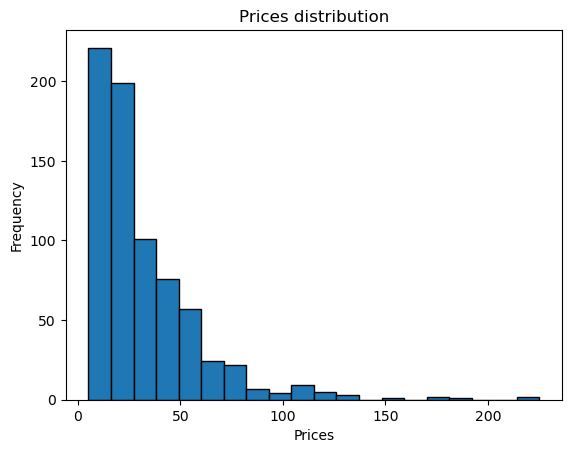

In [191]:
#Visualizing prices histogram
plt.hist(data['price'], bins=20, edgecolor='black')
plt.title('Prices distribution')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.show()


In [189]:
#Calculating central measures

price_mode = data['price'].mode()
price_mean = data['price'].mean()
price_median = data['price'].median()

print('Mode :', price_mode)
print('Mean :', price_mean)
print('Median :', price_median)


Mode : 0    19.0
Name: price, dtype: float64
Mean : 32.21689373297002
Median : 23.4


In [178]:
#Calculating measures of dispersion
ecart_type = data['price'].std()
print(ecart_type)

27.525448240541255


Prices deviate on average by 27 euros from the mean.

In [202]:
# Calculating the interquartile range (IQR)
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Determining the limits for outliers
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# Identifying outliers
outlier_values = data[(data['price'] < lower_limit) | (data['price'] > upper_limit)]

# Sorting outlier values by price
sorted_outliers = outlier_values[['product_id', 'price','post_name']].sort_values(by='price', ascending=False)

# Displaying sorted outliers by price
sorted_outliers.head(20)



,product_id,price,post_name
200,4352,225.0,champagne-egly-ouriet-grand-cru-millesime-2008
434,5001,217.5,david-duband-charmes-chambertin-grand-cru-2014
601,5892,191.3,coteaux-champenois-egly-ouriet-ambonnay-rouge-...
219,4402,176.0,cognac-frapin-vip-xo
566,5767,175.0,camille-giroud-clos-de-vougeot-2016
222,4406,157.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans
387,4904,137.0,domaine-des-croix-corton-charlemagne-grand-cru...
661,6126,135.0,champagne-gosset-celebris-vintage-2007
202,4355,126.5,champagne-egly-ouriet-grand-cru-brut-blanc-de-...
524,5612,124.8,domaine-weinbach-gewurztraminer-gc-furstentum-...


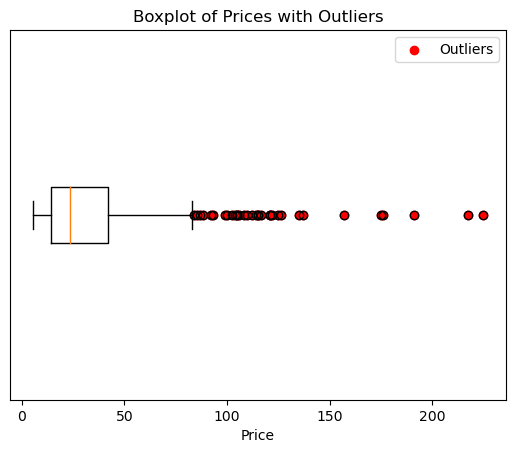

In [199]:
# Plotting the boxplot with outliers
plt.boxplot(data['price'], vert=False)
plt.scatter(outlier_values['price'], [1] * len(outlier_values), color='red', label='Outliers')
plt.title('Boxplot of Prices with Outliers')
plt.xlabel('Price')
plt.yticks([])
plt.legend()
plt.show()


"The outliers are explained by the fact that the store sells rare or collectible wines, Champagne and Cognac which can have very high prices."